In [40]:
import sys
from pathlib import Path
from addict import Dict as Adict
import pandas as pd
import seaborn as sns
import mdtraj as md
from natsort import natsorted
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.insert(0, '/home/rzhu/Desktop/projects/kinase_analysis/src/')
from TrajData import TrajData
from MSMStudy import MSMStudy

plt.rcParams['xtick.labelsize'] = 14  # Font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 14  # Font size for y-tick labels
plt.rcParams['legend.fontsize'] = 16  # Font size for legend
plt.rcParams['axes.labelsize'] = 18   # Font size for x-label and y-label
plt.rcParams['axes.titlesize'] = 18   # Font size for title

In [ ]:
protein = 'abl'
key = 'abl-pdb-50ps' # Dataset key 
study = 'with_prior' # where the results are saved
data_path = Path(f'/home/rzhu/Desktop/projects/kinase_analysis/data') # base dir

hps_df = pd.read_csv(data_path/f'{protein}'/'msm'/f'{study}'/'hps.csv')
TD = TrajData(protein = protein)
TD.add_dataset(rtraj_dir = Path(f'/arc/abl_processed/'), 
               ftraj_dir= data_path / f'{protein}'/ f'{key}' / 'ftrajs',
               dt=0.05,
               key=key)
study = MSMStudy(hps_table = hps_df,
                 traj_data = TD,
                 wk_dir = data_path/f'{protein}'/'msm'/f'{study}')
study.observation

Setting dataset <abl-pdb-50ps>. 
Number of raw trajectories: 749



,hp_id,time_consumed,is_sparse,ev_1,ev_2,ev_3,ev_4,ev_5,ev_6,ev_7,...,vamp2_std_2,vamp2_std_3,vamp2_std_4,vamp2_std_5,vamp2_std_6,vamp2_std_7,vamp2_std_8,vamp2_std_9,vamp2_std_10,vamp2_std_11
0,1,1074.410517,False,1.0,0.999890,0.999787,0.999782,0.999431,0.999369,0.997438,...,0.000140,0.000156,0.000186,0.000216,0.000257,0.000260,0.000290,0.000322,0.000335,0.003066
1,2,1013.094291,False,1.0,0.999886,0.999787,0.999762,0.999428,0.999368,0.997492,...,0.000135,0.000173,0.000192,0.000191,0.000224,0.000230,0.000256,0.000274,0.000279,0.003603
2,3,1017.254637,False,1.0,0.999891,0.999773,0.999725,0.999414,0.999363,0.997478,...,0.000178,0.000186,0.000219,0.000225,0.000256,0.000261,0.000279,0.000296,0.000310,0.000672
3,4,984.530003,False,1.0,0.999879,0.999758,0.999714,0.999405,0.999334,0.997464,...,0.000121,0.000171,0.000287,0.000222,0.000255,0.000262,0.000287,0.000306,0.000309,0.001657
4,5,3786.938161,False,1.0,0.999802,0.999065,0.998065,0.997963,0.997724,0.997167,...,0.000023,0.000032,0.000200,0.000305,0.000257,0.000259,0.000303,0.000339,0.000356,0.000374


In [4]:
study.set_hp_id(1)

Set dataset abl-pdb-50ps stride to 1
Loading MSM model id 1 from /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/1
{'hp_id': 1, 'datasets': 'abl-pdb-50ps', 'features': 'dbdist dbdihed achelix aloop', 'dt_out': 0.05, 'time_cutoff': 100, 'tica_lag_time': 1, 'tica_stride': 1000, 'tica_dim': 20, 'tica_kinetic_map': True, 'cluster_n': 1000, 'cluster_stride': 1000, 'cluster_max_iter': 1000, 'seed': 42, 'markov_lag_time': 10, 'markov_count_mode': 'effective', 'markov_count_prior': True, 'msm_mode': 'bayesian'}
Loading trajectories...
Loading models...
Done


In [18]:
study.hps_table

,hp_id,datasets,features,dt_out,time_cutoff,tica_lag_time,tica_stride,tica_dim,tica_kinetic_map,cluster_n,cluster_stride,cluster_max_iter,seed,markov_lag_time,markov_count_mode,markov_count_prior,msm_mode
0,1,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,10,effective,True,bayesian
1,2,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,20,effective,True,bayesian
2,3,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,50,effective,True,bayesian
3,4,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,100,effective,True,bayesian
4,5,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,2000,1000,1000,42,100,effective,True,bayesian
5,6,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,5000,1000,1000,42,100,effective,True,bayesian


In [33]:
no_of_ts_to_plot = 5
hp_idx_to_plot = [1, 2, 3, 4]
markov_lags = study.hps_table[study.hps_table['hp_id'].isin(hp_idx_to_plot)].markov_lag_time.to_numpy()

In [38]:
# Get timescales from each BayesianMSM
# Convert timescales to ns according to the dtraj timestep (dt_out)

timescales_mean = []
timescales_std = []
for hp_ix in hp_idx_to_plot:
    study.set_hp_id(hp_ix)
    summary = study.baymsm_mod.gather_stats('timescales', k=no_of_ts_to_plot)
    dt = study.hp_dict.dt_out
    timescales_mean.append(summary.mean*dt)
    timescales_std.append(summary.std*dt)

Set dataset abl-pdb-50ps stride to 1
Loading MSM model id 1 from /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/1
{'hp_id': 1, 'datasets': 'abl-pdb-50ps', 'features': 'dbdist dbdihed achelix aloop', 'dt_out': 0.05, 'time_cutoff': 100, 'tica_lag_time': 1, 'tica_stride': 1000, 'tica_dim': 20, 'tica_kinetic_map': True, 'cluster_n': 1000, 'cluster_stride': 1000, 'cluster_max_iter': 1000, 'seed': 42, 'markov_lag_time': 10, 'markov_count_mode': 'effective', 'markov_count_prior': True, 'msm_mode': 'bayesian'}
Loading trajectories...
Loading models...
Done
Set dataset abl-pdb-50ps stride to 1
Loading MSM model id 2 from /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/2
{'hp_id': 2, 'datasets': 'abl-pdb-50ps', 'features': 'dbdist dbdihed achelix aloop', 'dt_out': 0.05, 'time_cutoff': 100, 'tica_lag_time': 1, 'tica_stride': 1000, 'tica_dim': 20, 'tica_kinetic_map': True, 'cluster_n': 1000, 'cluster_stride': 1000, 'cluster_max_iter': 1000, 'seed': 42, 'mar

In [41]:
# Sort the timescales in case the markov lags are not in ascending order in study hps table
ind = np.argsort(markov_lags)
markov_lags = markov_lags[ind]
timescales_mean = np.array(timescales_mean)[ind]
timescales_std = np.array(timescales_std)[ind]

In [43]:
markov_lags

array([ 10,  20,  50, 100])

In [45]:
timescales_mean.shape

(4, 5)

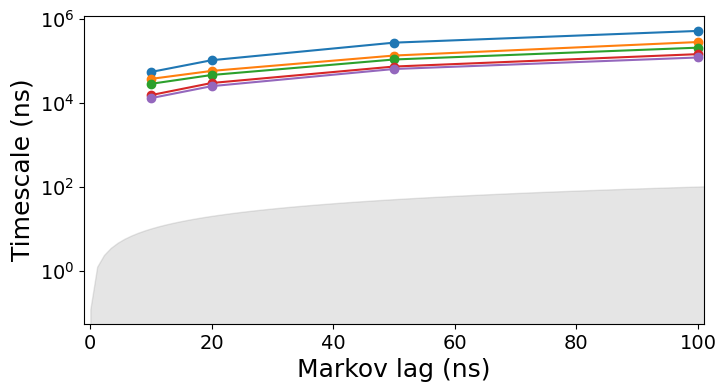

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

for i in range(no_of_ts_to_plot):
    ax.errorbar(x = markov_lags, 
                y = timescales_mean[:,i],
                yerr = timescales_std[:,i], 
                marker = 'o', 
                elinewidth = 2, capsize=2, capthick=1)

ax.fill_between(np.linspace(-1, max(markov_lags)+10, 100), 
                y1=np.linspace(-1,max(markov_lags)+10,100), 
                color='gray', 
                alpha=0.2)

ax.set_xlim([-1, max(markov_lags)+1])
ax.set_yscale('log')
ax.set_xlabel('Markov lag (ns)')
ax.set_ylabel('Timescale (ns)')

plt.savefig('its.pdf', bbox_inches='tight', dpi=300)
plt.show()